<a href="https://colab.research.google.com/github/ThomasDarrieumerlou/Forecasting-project/blob/main/Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime as dt
from IPython.display import display

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('AirPassengers.csv')
df.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


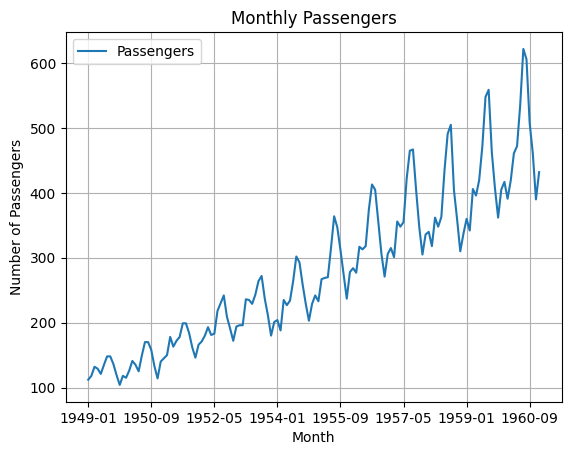

In [ ]:
df.plot(x='Month', y='#Passengers', label='Passengers')

plt.title('Monthly Passengers')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid()
plt.show()